# In 2017

           1                             2                           3  \
type   mulch not_mulch      total    mulch  not_mulch      total mulch   
5     0.3975  0.315441   0.712941  0.37525   1.000919   1.376169  0.08   
50    3.9750  3.154412   7.129412  3.75250  10.009191  13.761691  0.80   
100   7.9500  6.308824  14.258824  7.50500  20.018382  27.523382  1.60   

                                 4                              5             \
type  not_mulch      total   mulch  not_mulch      total    mulch  not_mulch   
5      2.013971   2.093971  0.4925   1.195037   1.687537   0.8075   2.996691   
50    20.139706  20.939706  4.9250  11.950368  16.875368   8.0750  29.966912   
100   40.279412  41.879412  9.8500  23.900735  33.750735  16.1500  59.933824   

                 
type      total  
5      3.804191  
50    38.041912  
100   76.083824  


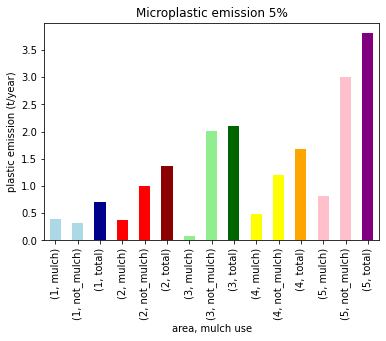

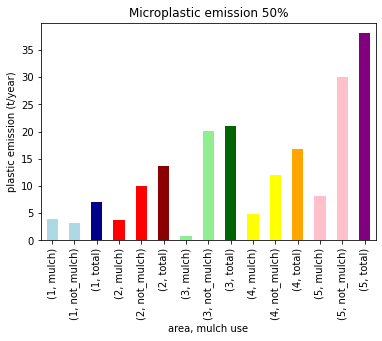

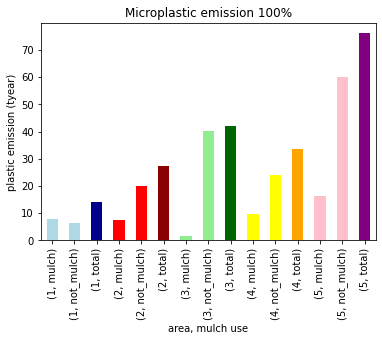

1                             2                           3  \
type   mulch not_mulch      total    mulch  not_mulch      total mulch   
5     0.3975  0.315441   0.712941  0.37525   1.000919   1.376169  0.08   
50    3.9750  3.154412   7.129412  3.75250  10.009191  13.761691  0.80   
100   7.9500  6.308824  14.258824  7.50500  20.018382  27.523382  1.60   

                                 4                              5             \
type  not_mulch      total   mulch  not_mulch      total    mulch  not_mulch   
5      2.013971   2.093971  0.4925   1.195037   1.687537   0.8075   2.996691   
50    20.139706  20.939706  4.9250  11.950368  16.875368   8.0750  29.966912   
100   40.279412  41.879412  9.8500  23.900735  33.750735  16.1500  59.933824   

                 
type      total  
5      3.804191  
50    38.041912  
100   76.083824

In [47]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import numpy as np

def microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface): 
    # Calculate the weight of the mulch
    sm = []
    for sur_mul in surface_mulch:
        weight_mulch = plastic_mulch * sur_mul
        sm.append(weight_mulch)
    
    # Calculate plastic in normal situation
    swm = []
    for sur_wmul in surface_without_mulch:
        plastic_normal_situation = (normal_plastic / NL_surface)*sur_wmul
        swm.append(plastic_normal_situation)
            
    # Calculate the plastic emission in the remnant and normal situation for different scenarios
    list2 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list1 = []
        for x in sm:
            formula_rem = x * (value/100) / erosion_speed
            list1.append(formula_rem)
        list2.append(list1)
    
    list4 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list3 = []
        for y in swm:
            formula_norm = y *(value/100) / erosion_speed
            list3.append(formula_norm)
        list4.append(list3)

    # Create and fill the dataframe
    df1 = pd.DataFrame(list2, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df1['type'] = 'mulch'
    df2 = pd.DataFrame(list4, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df2['type'] = 'not_mulch'
    
    combined = df1.append(df2)

    temp = pd.DataFrame(index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    temp[1] = combined[1].loc[combined['type'] == 'mulch'] + combined[1].loc[combined['type'] == 'not_mulch']
    temp[2] = combined[2].loc[combined['type'] == 'mulch'] + combined[2].loc[combined['type'] == 'not_mulch']
    temp[3] = combined[3].loc[combined['type'] == 'mulch'] + combined[3].loc[combined['type'] == 'not_mulch']
    temp[4] = combined[4].loc[combined['type'] == 'mulch'] + combined[4].loc[combined['type'] == 'not_mulch']
    temp[5] = combined[5].loc[combined['type'] == 'mulch'] + combined[5].loc[combined['type'] == 'not_mulch']
    temp['type'] = 'total'
    
    combine = combined.append(temp)

    table = pd.pivot_table(combine, index=combine.index,
                    columns=['type'])  
    return table
    

# Set the values of the variables
plastic_mulch = 0.2
surface_mulch = [15.9, 15.01, 3.2, 19.7, 32.3]
surface_without_mulch = [5.2, 16.5, 33.2, 19.7, 49.4]
remnant = [100, 50, 5]
normal_plastic = 1.65 * 10 ** 6
erosion_speed = 0.4
normal_situation = [100, 50, 5]
NL_surface = 3.4 * 10 ** 6


# Call the function
df = microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface) 
print (df)

# Plot the data
plt.figure(1)
df.loc[5].plot.bar(title='Microplastic emission 5%',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(2)
df.loc[50].plot.bar(title='Microplastic emission 50%',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(3)
df.loc[100].plot.bar(title='Microplastic emission 100%',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (tyear)')
plt.xlabel('area, mulch use')

plt.show()

df

### Difference no mulch versus total in 5% situation 

In [28]:
# test significance between no mulch and total in 5% situation
v1 = df.iloc[:, df.columns.get_level_values(1)=='total'].loc[5]
v2 = df.iloc[:, df.columns.get_level_values(1)=='not_mulch'].loc[5]

stats.ttest_ind(v1, v2)

Ttest_indResult(statistic=0.6202988412626391, pvalue=0.5523168996175358)

# In 2025

           1                             2                           3  \
type   mulch not_mulch      total    mulch  not_mulch      total mulch   
5     0.3975  0.252353   0.649853  0.37525   0.800735   1.175985  0.08   
50    3.9750  2.523529   6.498529  3.75250   8.007353  11.759853  0.80   
100   7.9500  5.047059  12.997059  7.50500  16.014706  23.519706  1.60   

                                 4                              5             \
type  not_mulch      total   mulch  not_mulch      total    mulch  not_mulch   
5      1.611176   1.691176  0.4925   0.956029   1.448529   0.8075   2.397353   
50    16.111765  16.911765  4.9250   9.560294  14.485294   8.0750  23.973529   
100   32.223529  33.823529  9.8500  19.120588  28.970588  16.1500  47.947059   

                 
type      total  
5      3.204853  
50    32.048529  
100   64.097059  


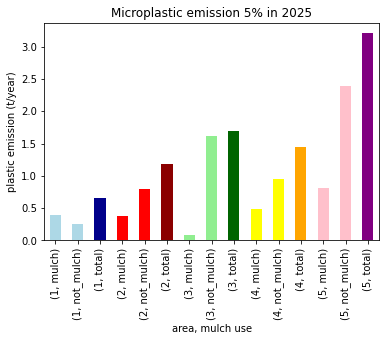

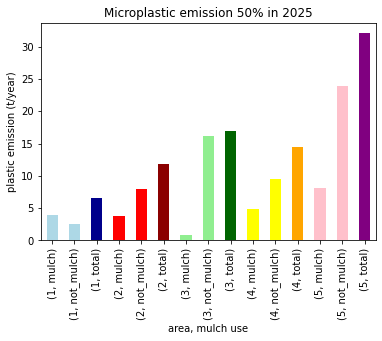

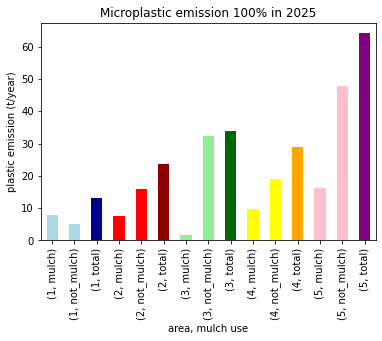

1                             2                           3  \
type   mulch not_mulch      total    mulch  not_mulch      total mulch   
5     0.3975  0.252353   0.649853  0.37525   0.800735   1.175985  0.08   
50    3.9750  2.523529   6.498529  3.75250   8.007353  11.759853  0.80   
100   7.9500  5.047059  12.997059  7.50500  16.014706  23.519706  1.60   

                                 4                              5             \
type  not_mulch      total   mulch  not_mulch      total    mulch  not_mulch   
5      1.611176   1.691176  0.4925   0.956029   1.448529   0.8075   2.397353   
50    16.111765  16.911765  4.9250   9.560294  14.485294   8.0750  23.973529   
100   32.223529  33.823529  9.8500  19.120588  28.970588  16.1500  47.947059   

                 
type      total  
5      3.204853  
50    32.048529  
100   64.097059

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import numpy as np

def microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface): 
    # Calculate the weight of the mulch
    sm = []
    for sur_mul in surface_mulch:
        weight_mulch = plastic_mulch * sur_mul
        sm.append(weight_mulch)
    
    # Calculate plastic in normal situation
    swm = []
    for sur_wmul in surface_without_mulch:
        plastic_normal_situation = (normal_plastic / NL_surface)*sur_wmul
        swm.append(plastic_normal_situation)
    
    # Make lists
    list_rem = {}
    list_norm = {}
  
        
    # Calculate the plastic emission in the remnant and normal situation for different scenarios
    list2 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list1 = []
        for x in sm:
            formula_rem = x * (value/100) / erosion_speed
            list1.append(formula_rem)
        list2.append(list1)
    
    list4 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list3 = []
        for y in swm:
            formula_norm = y *(value/100) / erosion_speed
            list3.append(formula_norm)
        list4.append(list3)

        
        
    # Create and fill the dataframe
    df1 = pd.DataFrame(list2, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df1['type'] = 'mulch'
    df2 = pd.DataFrame(list4, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df2['type'] = 'not_mulch'
    
    combined = df1.append(df2)

    temp = pd.DataFrame(index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    temp[1] = combined[1].loc[combined['type'] == 'mulch'] + combined[1].loc[combined['type'] == 'not_mulch']
    temp[2] = combined[2].loc[combined['type'] == 'mulch'] + combined[2].loc[combined['type'] == 'not_mulch']
    temp[3] = combined[3].loc[combined['type'] == 'mulch'] + combined[3].loc[combined['type'] == 'not_mulch']
    temp[4] = combined[4].loc[combined['type'] == 'mulch'] + combined[4].loc[combined['type'] == 'not_mulch']
    temp[5] = combined[5].loc[combined['type'] == 'mulch'] + combined[5].loc[combined['type'] == 'not_mulch']
    temp['type'] = 'total'
    
    combine = combined.append(temp)

    table = pd.pivot_table(combine, index=combine.index,
                    columns=['type'])  
    return table
    


# Set the values of the variables
plastic_mulch = 0.2
surface_mulch = [15.9, 15.01, 3.2, 19.7, 32.3]
surface_without_mulch = [5.2, 16.5, 33.2, 19.7, 49.4]
remnant = [100, 50, 5]
normal_plastic = 1.65 * 10 ** 6 * 0.8
erosion_speed = 0.4
normal_situation = [100, 50, 5]
NL_surface = 3.4 * 10 ** 6


# Call the function
df2 = microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface) 

print(df2)
# Plot the data
plt.figure(1)
df2.loc[5].plot.bar(title='Microplastic emission 5% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(2)
df2.loc[50].plot.bar(title='Microplastic emission 50% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(3)
df2.loc[100].plot.bar(title='Microplastic emission 100% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.show()

df2

### Difference plastic emission 2017 versus 2025 in 5% situation

In [33]:
# test significance between total plastic emission in 2017 versus 2025 in 5% situation
v1 = df2.iloc[:, df2.columns.get_level_values(1)=='not_mulch'].loc[5]
v2 = df2.iloc[:, df2.columns.get_level_values(1)=='total'].loc[5]

stats.ttest_ind(v1, v2)

Ttest_indResult(statistic=-0.7609220274143853, pvalue=0.4685363109357189)

# In 2025 with biodegradable plastic mulch

          1                            2                            3  \
type  mulch not_mulch      total   mulch  not_mulch      total  mulch   
5     0.318  0.252353   0.570353  0.3002   0.800735   1.100935  0.064   
50    3.180  2.523529   5.703529  3.0020   8.007353  11.009353  0.640   
100   6.360  5.047059  11.407059  6.0040  16.014706  22.018706  1.280   

                                4                             5             \
type  not_mulch      total  mulch  not_mulch      total   mulch  not_mulch   
5      1.611176   1.675176  0.394   0.956029   1.350029   0.646   2.397353   
50    16.111765  16.751765  3.940   9.560294  13.500294   6.460  23.973529   
100   32.223529  33.503529  7.880  19.120588  27.000588  12.920  47.947059   

                 
type      total  
5      3.043353  
50    30.433529  
100   60.867059  


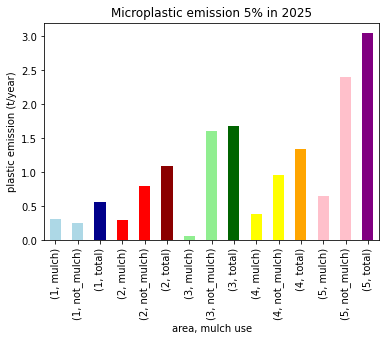

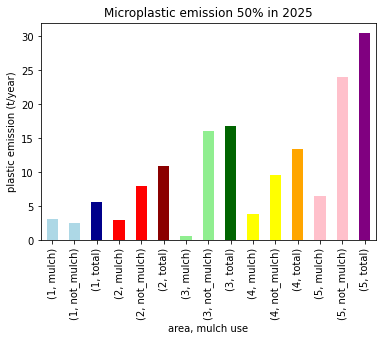

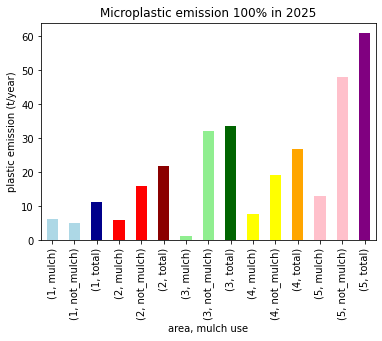

1                            2                            3  \
type  mulch not_mulch      total   mulch  not_mulch      total  mulch   
5     0.318  0.252353   0.570353  0.3002   0.800735   1.100935  0.064   
50    3.180  2.523529   5.703529  3.0020   8.007353  11.009353  0.640   
100   6.360  5.047059  11.407059  6.0040  16.014706  22.018706  1.280   

                                4                             5             \
type  not_mulch      total  mulch  not_mulch      total   mulch  not_mulch   
5      1.611176   1.675176  0.394   0.956029   1.350029   0.646   2.397353   
50    16.111765  16.751765  3.940   9.560294  13.500294   6.460  23.973529   
100   32.223529  33.503529  7.880  19.120588  27.000588  12.920  47.947059   

                 
type      total  
5      3.043353  
50    30.433529  
100   60.867059

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import numpy as np

def microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface): 
    # Calculate the weight of the mulch
    sm = []
    for sur_mul in surface_mulch:
        weight_mulch = plastic_mulch * sur_mul
        sm.append(weight_mulch)
    
    # Calculate plastic in normal situation
    swm = []
    for sur_wmul in surface_without_mulch:
        plastic_normal_situation = (normal_plastic / NL_surface)*sur_wmul
        swm.append(plastic_normal_situation)
    
    # Make lists
    list_rem = {}
    list_norm = {}
  
        
    # Calculate the plastic emission in the remnant and normal situation for different scenarios
    list2 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list1 = []
        for x in sm:
            formula_rem = x * (value/100) / erosion_speed
            list1.append(formula_rem)
        list2.append(list1)
    
    list4 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list3 = []
        for y in swm:
            formula_norm = y *(value/100) / erosion_speed
            list3.append(formula_norm)
        list4.append(list3)

        
        
    # Create and fill the dataframe
    df1 = pd.DataFrame(list2, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df1['type'] = 'mulch'
    df2 = pd.DataFrame(list4, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df2['type'] = 'not_mulch'
    
    combined = df1.append(df2)

    temp = pd.DataFrame(index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    temp[1] = combined[1].loc[combined['type'] == 'mulch'] + combined[1].loc[combined['type'] == 'not_mulch']
    temp[2] = combined[2].loc[combined['type'] == 'mulch'] + combined[2].loc[combined['type'] == 'not_mulch']
    temp[3] = combined[3].loc[combined['type'] == 'mulch'] + combined[3].loc[combined['type'] == 'not_mulch']
    temp[4] = combined[4].loc[combined['type'] == 'mulch'] + combined[4].loc[combined['type'] == 'not_mulch']
    temp[5] = combined[5].loc[combined['type'] == 'mulch'] + combined[5].loc[combined['type'] == 'not_mulch']
    temp['type'] = 'total'
    
    combine = combined.append(temp)

    table = pd.pivot_table(combine, index=combine.index,
                    columns=['type'])  
    return table
    


# Set the values of the variables
plastic_mulch = 0.2 * 0.8
surface_mulch = [15.9, 15.01, 3.2, 19.7, 32.3]
surface_without_mulch = [5.2, 16.5, 33.2, 19.7, 49.4]
remnant = [100, 50, 5]
normal_plastic = 1.65 * 10 ** 6 * 0.8
erosion_speed = 0.4
normal_situation = [100, 50, 5]
NL_surface = 3.4 * 10 ** 6


# Call the function
df5 = microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface) 
print(df5)

# Plot the data
plt.figure(1)
df5.loc[5].plot.bar(title='Microplastic emission 5% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(2)
df5.loc[50].plot.bar(title='Microplastic emission 50% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(3)
df5.loc[100].plot.bar(title='Microplastic emission 100% in 2025',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.show()

df5

### Difference between with and without biodegradable plastic mulch in 2025 in 5% situation

In [34]:
# test significance between total plastic emission in 2017 versus 2025 in 5% situation
v1 = df5.iloc[:, df5.columns.get_level_values(1)=='total'].loc[5]
v2 = df5.iloc[:, df5.columns.get_level_values(1)=='not_mulch'].loc[5]

stats.ttest_ind(v1, v2)

Ttest_indResult(statistic=0.6202988412626389, pvalue=0.552316899617536)

# In 2050

           1                            2                          3  \
type   mulch not_mulch     total    mulch not_mulch      total mulch   
5     0.3975  0.055202  0.452702  0.37525  0.175161   0.550411  0.08   
50    3.9750  0.552022  4.527022  3.75250  1.751608   5.504108  0.80   
100   7.9500  1.104044  9.054044  7.50500  3.503217  11.008217  1.60   

                               4                             5             \
type not_mulch     total   mulch not_mulch      total    mulch  not_mulch   
5     0.352445  0.432445  0.4925  0.209131   0.701631   0.8075   0.524421   
50    3.524449  4.324449  4.9250  2.091314   7.016314   8.0750   5.244210   
100   7.048897  8.648897  9.8500  4.182629  14.032629  16.1500  10.488419   

                 
type      total  
5      1.331921  
50    13.319210  
100   26.638419  


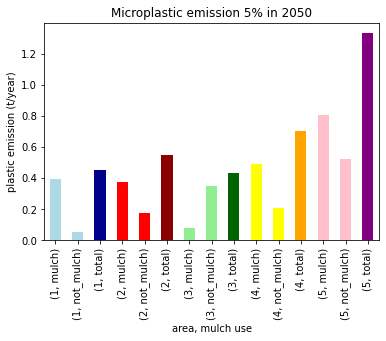

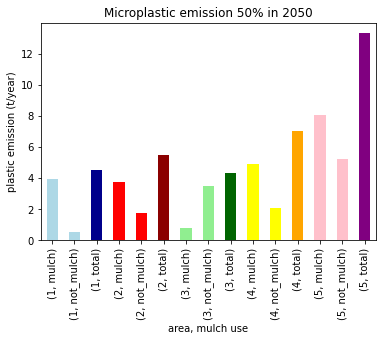

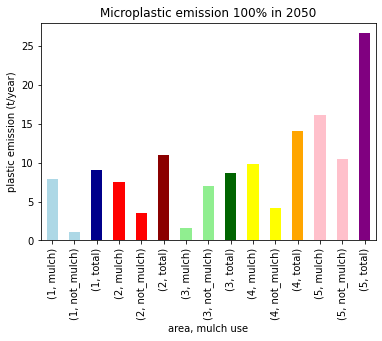

1                            2                          3  \
type   mulch not_mulch     total    mulch not_mulch      total mulch   
5     0.3975  0.055202  0.452702  0.37525  0.175161   0.550411  0.08   
50    3.9750  0.552022  4.527022  3.75250  1.751608   5.504108  0.80   
100   7.9500  1.104044  9.054044  7.50500  3.503217  11.008217  1.60   

                               4                             5             \
type not_mulch     total   mulch not_mulch      total    mulch  not_mulch   
5     0.352445  0.432445  0.4925  0.209131   0.701631   0.8075   0.524421   
50    3.524449  4.324449  4.9250  2.091314   7.016314   8.0750   5.244210   
100   7.048897  8.648897  9.8500  4.182629  14.032629  16.1500  10.488419   

                 
type      total  
5      1.331921  
50    13.319210  
100   26.638419

In [50]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import numpy as np

def microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface): 
    # Calculate the weight of the mulch
    sm = []
    for sur_mul in surface_mulch:
        weight_mulch = plastic_mulch * sur_mul
        sm.append(weight_mulch)
    
    # Calculate plastic in normal situation
    swm = []
    for sur_wmul in surface_without_mulch:
        plastic_normal_situation = (normal_plastic / NL_surface)*sur_wmul
        swm.append(plastic_normal_situation)
    
    # Make lists
    list_rem = {}
    list_norm = {}
  
        
    # Calculate the plastic emission in the remnant and normal situation for different scenarios
    list2 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list1 = []
        for x in sm:
            formula_rem = x * (value/100) / erosion_speed
            list1.append(formula_rem)
        list2.append(list1)
    
    list4 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list3 = []
        for y in swm:
            formula_norm = y *(value/100) / erosion_speed
            list3.append(formula_norm)
        list4.append(list3)

        
        
    # Create and fill the dataframe
    df1 = pd.DataFrame(list2, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df1['type'] = 'mulch'
    df2 = pd.DataFrame(list4, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df2['type'] = 'not_mulch'
    
    combined = df1.append(df2)

    temp = pd.DataFrame(index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    temp[1] = combined[1].loc[combined['type'] == 'mulch'] + combined[1].loc[combined['type'] == 'not_mulch']
    temp[2] = combined[2].loc[combined['type'] == 'mulch'] + combined[2].loc[combined['type'] == 'not_mulch']
    temp[3] = combined[3].loc[combined['type'] == 'mulch'] + combined[3].loc[combined['type'] == 'not_mulch']
    temp[4] = combined[4].loc[combined['type'] == 'mulch'] + combined[4].loc[combined['type'] == 'not_mulch']
    temp[5] = combined[5].loc[combined['type'] == 'mulch'] + combined[5].loc[combined['type'] == 'not_mulch']
    temp['type'] = 'total'
    
    combine = combined.append(temp)

    table = pd.pivot_table(combine, index=combine.index,
                    columns=['type'])  
    return table
    


# Set the values of the variables
plastic_mulch = 0.2
surface_mulch = [15.9, 15.01, 3.2, 19.7, 32.3]
surface_without_mulch = [5.2, 16.5, 33.2, 19.7, 49.4]
remnant = [100, 50, 5]
normal_plastic = 1.65 * 10 ** 6 * 0.175
erosion_speed = 0.4
normal_situation = [100, 50, 5]
NL_surface = 3.4 * 10 ** 6


# Call the function
df3 = microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface) 
print(df3)

# Plot the data
plt.figure(1)
df3.loc[5].plot.bar(title='Microplastic emission 5% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(2)
df3.loc[50].plot.bar(title='Microplastic emission 50% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(3)
df3.loc[100].plot.bar(title='Microplastic emission 100% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.show()

df3

### Difference plastic emission 2017 versus 2050 in 5% situation

In [31]:
# test significance between plastic emission in 2017 versus 2050 in 5% situation
v1 = df3.iloc[:, df3.columns.get_level_values(1)=='total'].loc[5]
v2 = df3.iloc[:, df3.columns.get_level_values(1)=='not_mulch'].loc[5]

stats.ttest_ind(v1, v2)

Ttest_indResult(statistic=2.3274789079113414, pvalue=0.048351608256307965)

# In 2050 with biodegradable plastic mulch

           1                            2                          3  \
type   mulch not_mulch     total    mulch not_mulch     total  mulch   
5     0.2385  0.055202  0.293702  0.22515  0.175161  0.400311  0.048   
50    2.3850  0.552022  2.937022  2.25150  1.751608  4.003108  0.480   
100   4.7700  1.104044  5.874044  4.50300  3.503217  8.006217  0.960   

                               4                            5             \
type not_mulch     total   mulch not_mulch      total   mulch  not_mulch   
5     0.352445  0.400445  0.2955  0.209131   0.504631  0.4845   0.524421   
50    3.524449  4.004449  2.9550  2.091314   5.046314  4.8450   5.244210   
100   7.048897  8.008897  5.9100  4.182629  10.092629  9.6900  10.488419   

                 
type      total  
5      1.008921  
50    10.089210  
100   20.178419  


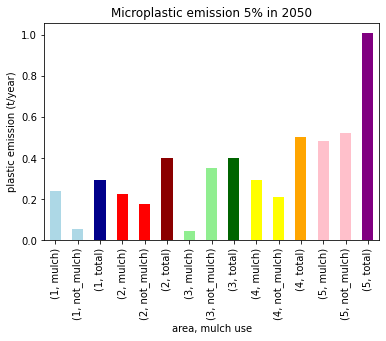

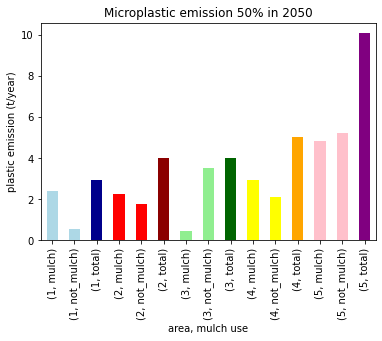

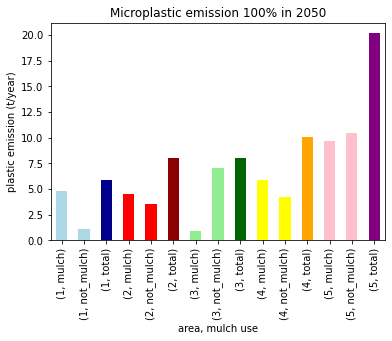

1                            2                          3  \
type   mulch not_mulch     total    mulch not_mulch     total  mulch   
5     0.2385  0.055202  0.293702  0.22515  0.175161  0.400311  0.048   
50    2.3850  0.552022  2.937022  2.25150  1.751608  4.003108  0.480   
100   4.7700  1.104044  5.874044  4.50300  3.503217  8.006217  0.960   

                               4                            5             \
type not_mulch     total   mulch not_mulch      total   mulch  not_mulch   
5     0.352445  0.400445  0.2955  0.209131   0.504631  0.4845   0.524421   
50    3.524449  4.004449  2.9550  2.091314   5.046314  4.8450   5.244210   
100   7.048897  8.008897  5.9100  4.182629  10.092629  9.6900  10.488419   

                 
type      total  
5      1.008921  
50    10.089210  
100   20.178419

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import numpy as np

def microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface): 
    # Calculate the weight of the mulch
    sm = []
    for sur_mul in surface_mulch:
        weight_mulch = plastic_mulch * sur_mul
        sm.append(weight_mulch)
    
    # Calculate plastic in normal situation
    swm = []
    for sur_wmul in surface_without_mulch:
        plastic_normal_situation = (normal_plastic / NL_surface)*sur_wmul
        swm.append(plastic_normal_situation)
    
    # Make lists
    list_rem = {}
    list_norm = {}
  
        
    # Calculate the plastic emission in the remnant and normal situation for different scenarios
    list2 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list1 = []
        for x in sm:
            formula_rem = x * (value/100) / erosion_speed
            list1.append(formula_rem)
        list2.append(list1)
    
    list4 = []  
    for value in remnant:
        count = 0
        count2 = 0
        list3 = []
        for y in swm:
            formula_norm = y *(value/100) / erosion_speed
            list3.append(formula_norm)
        list4.append(list3)

        
        
    # Create and fill the dataframe
    df1 = pd.DataFrame(list2, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df1['type'] = 'mulch'
    df2 = pd.DataFrame(list4, index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    df2['type'] = 'not_mulch'
    
    combined = df1.append(df2)

    temp = pd.DataFrame(index=[100, 50, 5], columns=[1, 2, 3, 4, 5])
    temp[1] = combined[1].loc[combined['type'] == 'mulch'] + combined[1].loc[combined['type'] == 'not_mulch']
    temp[2] = combined[2].loc[combined['type'] == 'mulch'] + combined[2].loc[combined['type'] == 'not_mulch']
    temp[3] = combined[3].loc[combined['type'] == 'mulch'] + combined[3].loc[combined['type'] == 'not_mulch']
    temp[4] = combined[4].loc[combined['type'] == 'mulch'] + combined[4].loc[combined['type'] == 'not_mulch']
    temp[5] = combined[5].loc[combined['type'] == 'mulch'] + combined[5].loc[combined['type'] == 'not_mulch']
    temp['type'] = 'total'
    
    combine = combined.append(temp)

    table = pd.pivot_table(combine, index=combine.index,
                    columns=['type'])  
    return table
    


# Set the values of the variables
plastic_mulch = 0.2 * 0.6
surface_mulch = [15.9, 15.01, 3.2, 19.7, 32.3]
surface_without_mulch = [5.2, 16.5, 33.2, 19.7, 49.4]
remnant = [100, 50, 5]
normal_plastic = 1.65 * 10 ** 6 * 0.175
erosion_speed = 0.4
normal_situation = [100, 50, 5]
NL_surface = 3.4 * 10 ** 6


# Call the function
df4 = microplastic_emission(plastic_mulch, surface_mulch, surface_without_mulch, remnant, normal_plastic, erosion_speed, normal_situation, NL_surface) 
print(df4)
# Plot the data
plt.figure(1)
df4.loc[5].plot.bar(title='Microplastic emission 5% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(2)
df4.loc[50].plot.bar(title='Microplastic emission 50% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.figure(3)
df4.loc[100].plot.bar(title='Microplastic emission 100% in 2050',
    color=['lightblue','lightblue','darkblue','red', 'red','darkred','lightgreen','lightgreen','darkgreen', 'yellow','yellow','orange', 'pink', 'pink','purple'])
plt.ylabel('plastic emission (t/year)')
plt.xlabel('area, mulch use')

plt.show()

df4

### Difference between with and without biodegradable plastic mulch in 2050 in 5% situation

In [32]:
# test significance between plastic emission in 2017 versus 2050 in 5% situation
v1 = df4.iloc[:, df4.columns.get_level_values(1)=='total'].loc[5]
v2 = df4.iloc[:, df4.columns.get_level_values(1)=='not_mulch'].loc[5]

stats.ttest_ind(v1, v2)

Ttest_indResult(statistic=1.7236656048268661, pvalue=0.123059369964685)